We want to maximise the function 
$$
f(x) = -(x-7)^2+49
$$
This function has its maximum when $x=7$, and gives a hill-shaped curve. We'll use two different heuristic search methods to find that peak. 

#### Hill Climbing 
Hill climbing is like climbing a hill blindfolded: you feel around the move to a better neighbour (higher point), step by step. 

##### Pseudocode 

Start at x
While there is a better neighbor:
    Move to the neighbor with highest value
Return current x as the peak


##### Python code 

In [1]:
def f(x):
    return -(x - 7)**2 + 49

def hill_climb_iterative(start):
    x = start
    while True:
        print(f"At x={x}, f(x)={f(x)}")
        neighbors = [x - 1, x + 1]
        best_neighbor = x

        for nx in neighbors:
            if 0 <= nx <= 15 and f(nx) > f(best_neighbor):
                best_neighbor = nx

        if best_neighbor == x:
            print("Reached peak!")
            return x
        else:
            x = best_neighbor

hill_climb_iterative(3)


At x=3, f(x)=33
At x=4, f(x)=40
At x=5, f(x)=45
At x=6, f(x)=48
At x=7, f(x)=49
Reached peak!


7

Reached peak at x = 7, f(x) = 49


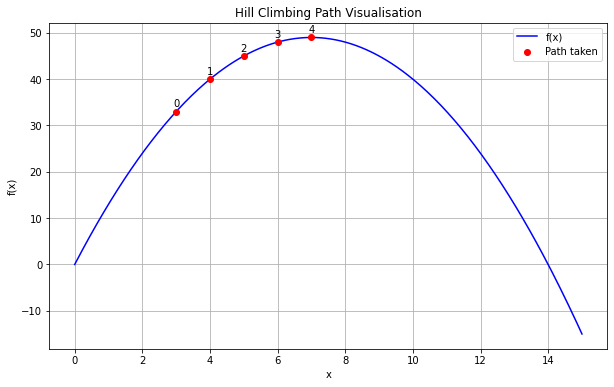

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Objective function
def f(x):
    return -(x - 7)**2 + 49

# Hill climbing with visualization
def hill_climb_visual(start):
    x = start
    path = [x]

    while True:
        neighbors = [x - 1, x + 1]
        best_neighbor = x

        for nx in neighbors:
            if 0 <= nx <= 15 and f(nx) > f(best_neighbor):
                best_neighbor = nx

        if best_neighbor == x:
            print(f"Reached peak at x = {x}, f(x) = {f(x)}")
            break
        else:
            x = best_neighbor
            path.append(x)

    # Plotting
    X = np.linspace(0, 15, 300)
    Y = f(X)

    plt.figure(figsize=(10, 6))
    plt.plot(X, Y, label='f(x)', color='blue')
    plt.scatter(path, [f(xi) for xi in path], color='red', zorder=5, label='Path taken')
    for i, xi in enumerate(path):
        plt.annotate(f'{i}', (xi, f(xi)), textcoords="offset points", xytext=(0,5), ha='center')

    plt.title('Hill Climbing Path Visualisation')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

hill_climb_visual(3)

#### Simulated Annealing
When you cool metal, at high temperature its atoms can move freely, exploring many configurations (even "bad" ones, with higher energy) before settling. This helps avoid getting stuck in a bad arrangement. As you cool, the atoms settle into the best (lowest energy) arrangement. Inspired by metal cooling: sometimes we accept "bad moves" to escape local maxima and explore better global solutions. In simulated annealing, we allow worse solutions with a probability based on a "temperature" that slowly cools down. 

##### Pseudocode

Start at x with high temperature
While temperature is still warm:
    Pick a random neighbor
    If it's better → move there
    If it's worse → maybe move (probabilistic)
    Cool the temperature
Return current x


##### Python code

In [4]:
import random
import math

def f(x):
    return -(x - 7)**2 + 49

def simulated_annealing_iterative(start, temperature):
    x = start

    while temperature > 0.1:
        print(f"At x={x}, f(x)={f(x)}, T={temperature:.2f}")
        nx = x + random.choice([-1, 1])
        if not 0 <= nx <= 15:
            temperature *= 0.9
            continue

        delta = f(nx) - f(x)
        if delta > 0 or random.random() < math.exp(delta / temperature):
            x = nx

        temperature *= 0.9

    print("Cooling finished.")
    return x

simulated_annealing_iterative(0, 10)


At x=0, f(x)=0, T=10.00
At x=0, f(x)=0, T=9.00
At x=0, f(x)=0, T=8.10
At x=0, f(x)=0, T=7.29
At x=0, f(x)=0, T=6.56
At x=1, f(x)=13, T=5.90
At x=2, f(x)=24, T=5.31
At x=2, f(x)=24, T=4.78
At x=2, f(x)=24, T=4.30
At x=2, f(x)=24, T=3.87
At x=2, f(x)=24, T=3.49
At x=2, f(x)=24, T=3.14
At x=2, f(x)=24, T=2.82
At x=3, f(x)=33, T=2.54
At x=3, f(x)=33, T=2.29
At x=4, f(x)=40, T=2.06
At x=4, f(x)=40, T=1.85
At x=5, f(x)=45, T=1.67
At x=6, f(x)=48, T=1.50
At x=6, f(x)=48, T=1.35
At x=6, f(x)=48, T=1.22
At x=7, f(x)=49, T=1.09
At x=7, f(x)=49, T=0.98
At x=7, f(x)=49, T=0.89
At x=8, f(x)=48, T=0.80
At x=8, f(x)=48, T=0.72
At x=8, f(x)=48, T=0.65
At x=8, f(x)=48, T=0.58
At x=8, f(x)=48, T=0.52
At x=7, f(x)=49, T=0.47
At x=7, f(x)=49, T=0.42
At x=7, f(x)=49, T=0.38
At x=7, f(x)=49, T=0.34
At x=7, f(x)=49, T=0.31
At x=7, f(x)=49, T=0.28
At x=7, f(x)=49, T=0.25
At x=7, f(x)=49, T=0.23
At x=7, f(x)=49, T=0.20
At x=7, f(x)=49, T=0.18
At x=7, f(x)=49, T=0.16
At x=7, f(x)=49, T=0.15
At x=7, f(x)=49, T=0

7

Finished at x=7, f(x)=49
[0, 1, 2, 3, 4, 5, 6, 7, 8, 7, 6, 7]
[0, 13, 24, 33, 40, 45, 48, 49, 48, 49, 48, 49]


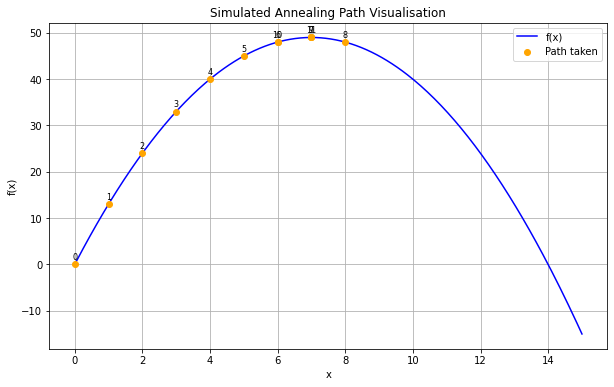

In [10]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

# Objective function
def f(x):
    return -(x - 7)**2 + 49

# Simulated annealing with path visualization
def simulated_annealing_visual(start, temperature):
    x = start
    path = [(x, f(x))]

    while temperature > 0.1:
        nx = x + random.choice([-1, 1])
        if not 0 <= nx <= 15:
            temperature *= 0.9
            continue

        delta = f(nx) - f(x)
        # Accept move if better or probabilistically
        if delta > 0 or random.random() < math.exp(delta / temperature):
            x = nx
            path.append((x, f(x)))

        temperature *= 0.9

    print(f"Finished at x={x}, f(x)={f(x)}")
    
    # Plotting
    X = np.linspace(0, 15, 300)
    Y = f(X)

    plt.figure(figsize=(10, 6))
    plt.plot(X, Y, label='f(x)', color='blue')
    
    path_x = [p[0] for p in path]
    path_y = [p[1] for p in path]
    print(path_x)
    print(path_y)
    
    plt.scatter(path_x, path_y, color='orange', zorder=5, label='Path taken')
    
    for i, (xi, yi) in enumerate(path):
        plt.annotate(f'{i}', (xi, yi), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)
    
    plt.title('Simulated Annealing Path Visualisation')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Run it
simulated_annealing_visual(0, 10)